#  Movie Genre Classification

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_data=pd.read_csv("C:/Users/win10/Basic projects ML/Genre Classification Dataset/train_data.txt",delimiter=':::',header=None)
train_data.columns=['ID','TITLE','GENRE','DESCRIPTION']
train_data.to_csv('train_data.csv',index=None)

C:\Users\win10\AppData\Local\Temp\ipykernel_10144\3457299390.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data=pd.read_csv("C:/Users/win10/Basic projects ML/Genre Classification Dataset/train_data.txt",delimiter=':::',header=None)


In [6]:
test_solution=pd.read_csv("C:/Users/win10/Basic projects ML/Genre Classification Dataset/test_data_solution.txt",delimiter=':::',header=None)
test_solution.columns=['ID','TITLE','GENRE','DESCRIPTION']
test_solution.to_csv('test_data_solution.csv',index=None)

C:\Users\win10\AppData\Local\Temp\ipykernel_10144\630263410.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution=pd.read_csv("C:/Users/win10/Basic projects ML/Genre Classification Dataset/test_data_solution.txt",delimiter=':::',header=None)


In [7]:
test_data=pd.read_csv('test_data_solution.csv')
test_data.head()
test_data.shape

(54200, 4)

In [8]:
train_data=pd.read_csv('train_data.csv')
train_data.head()
train_data.shape

(54214, 4)

In [9]:
df=pd.concat([train_data,test_data],ignore_index=True)
df=df.drop(['ID'],axis=1)
df

,TITLE,GENRE,DESCRIPTION
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
108409,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
108410,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
108411,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
108412,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [10]:
df.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

<Axes: xlabel='GENRE', ylabel='count'>

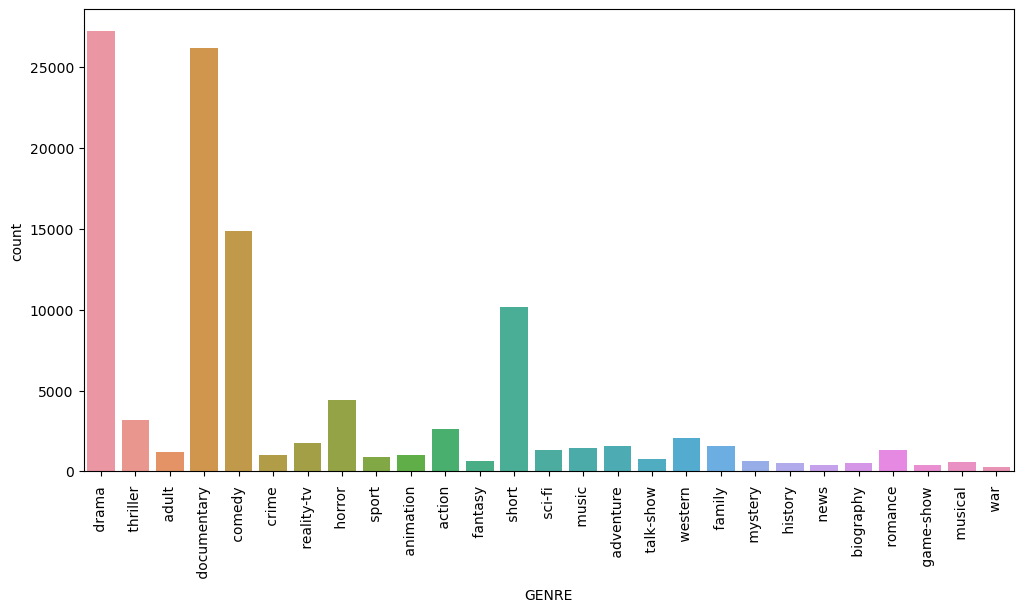

In [11]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(data=df,x='GENRE')

In [12]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['genre_code']=le.fit_transform(df['GENRE'])
df.head()

,TITLE,GENRE,DESCRIPTION,genre_code
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8


In [13]:
dict(zip(le.classes_,le.transform(le.classes_)))

{' action ': 0,
 ' adult ': 1,
 ' adventure ': 2,
 ' animation ': 3,
 ' biography ': 4,
 ' comedy ': 5,
 ' crime ': 6,
 ' documentary ': 7,
 ' drama ': 8,
 ' family ': 9,
 ' fantasy ': 10,
 ' game-show ': 11,
 ' history ': 12,
 ' horror ': 13,
 ' music ': 14,
 ' musical ': 15,
 ' mystery ': 16,
 ' news ': 17,
 ' reality-tv ': 18,
 ' romance ': 19,
 ' sci-fi ': 20,
 ' short ': 21,
 ' sport ': 22,
 ' talk-show ': 23,
 ' thriller ': 24,
 ' war ': 25,
 ' western ': 26}

In [14]:
df['DESCRIPTION'][0]

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [16]:
stemmer = PorterStemmer()
def preprocess(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return (' '.join(stemmed_tokens))

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
df['desc']=df['DESCRIPTION'].apply(lambda x:preprocess(x))

In [20]:
preprocess(df['DESCRIPTION'][0])

'listen convers doctor parent 10yearold oscar learn nobodi courag tell week live furiou refus speak anyon except straighttalk rose ladi pink meet hospit stair christma approach rose use fantast experi profession wrestler imagin wit charm allow oscar live life love full compani friend pop corn einstein bacon childhood sweetheart peggi blue'

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
df.head()

,TITLE,GENRE,DESCRIPTION,genre_code,desc
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listen convers doctor parent 10yearold oscar l...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestu relationship curre...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bu empti student field trip museum natur histo...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemploy father make end meet edith twin ...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,film titl refer unrecov bodi ground zero also ...


In [23]:
x=df['desc']
y=df['genre_code']

In [24]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
x_tfidf = tfidf_vectorizer.fit_transform(x)
x_tfidf

<108414x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3960983 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(x_tfidf,y,test_size=0.3)

In [26]:
from sklearn.metrics import accuracy_score,classification_report
     

def modelizer(clf):
    clf.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(x_test)

    # Evaluate the model
    print('\nAccuracy: ',accuracy_score(y_test, y_pred))
    print('\nClassification Report:\n',classification_report(y_test, y_pred))

In [27]:
from sklearn.naive_bayes import MultinomialNB
modelizer(MultinomialNB())


Accuracy:  0.5252267486548808

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.15      0.24       838
           1       0.71      0.07      0.13       392
           2       0.58      0.13      0.21       481
           3       1.00      0.00      0.01       316
           4       0.00      0.00      0.00       167
           5       0.52      0.45      0.48      4462
           6       0.00      0.00      0.00       297
           7       0.57      0.86      0.68      7819
           8       0.46      0.81      0.59      8105
           9       0.71      0.01      0.02       457
          10       0.00      0.00      0.00       213
          11       1.00      0.31      0.47       116
          12       0.00      0.00      0.00       147
          13       0.69      0.38      0.49      1344
          14       0.72      0.20      0.32       431
          15       0.00      0.00      0.00       157
          16       0.00  

C:\Users\win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\win10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
